In [2]:
#from geobr import read_state
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import utils

DATA_DIR = Path().resolve().parent / 'dados'
#TSE_DADOS_DIR = DATA_DIR / 'tse'
TSE_DADOS_DIR = Path('~/local/datasets/dados-tse')
ELEICOES_FILE = DATA_DIR / 'eleicoes_resultado_presidente_uf_2018_2022.csv'

#sns.set(rc={'figure.figsize':(14, 8)})
sns.set_style("whitegrid")
sns.set_context("talk")

# Na primeira vez, descomente e rode o comando abaixo para gerar o arquivo de entrada
utils.etl_eleicoes(TSE_DADOS_DIR, ELEICOES_FILE)

,ano_eleicao,nr_turno,nr_candidato,nm_urna_candidato,uf,votos,perc_votos
0,2018,1,12,CIRO GOMES,AC,21809,5.170730
1,2018,1,12,CIRO GOMES,AL,155457,10.122572
2,2018,1,12,CIRO GOMES,AM,138997,7.498796
3,2018,1,12,CIRO GOMES,AP,50553,12.337312
4,2018,1,12,CIRO GOMES,BA,693273,9.408547
...,...,...,...,...,...,...,...
751,2022,1,22,JAIR BOLSONARO,ZZ,122548,41.610000
752,2022,1,44,SORAYA THRONICKE,ZZ,753,0.260000
753,2022,1,80,LÉO PÉRICLES,ZZ,319,0.110000
754,2022,1,16,VERA,ZZ,464,0.160000


In [ ]:
eleicoes = pd.read_csv(ELEICOES_FILE)

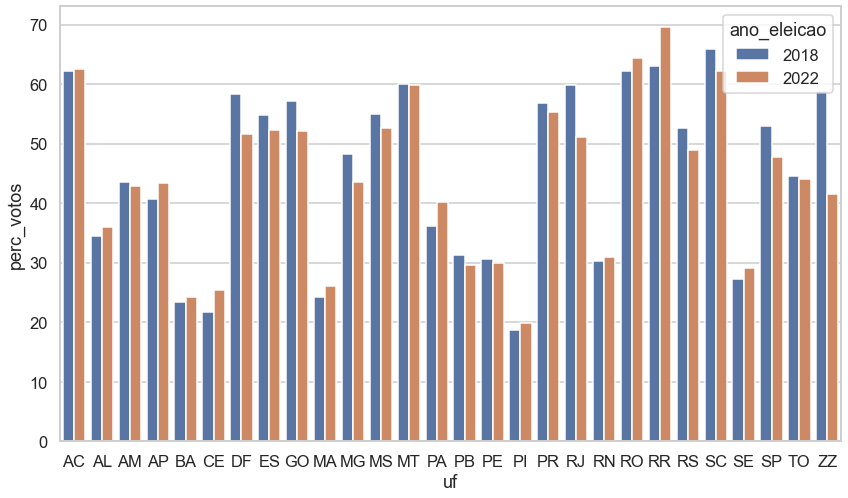

In [ ]:
bolsonaro = eleicoes.loc[(eleicoes.nm_urna_candidato == 'JAIR BOLSONARO') & (eleicoes.nr_turno == 1)]
fig, ax = plt.subplots(figsize=(14, 8))
p = sns.barplot(x='uf', y='perc_votos', hue='ano_eleicao', ax=ax, data=bolsonaro)
plt.show()

In [ ]:
bolsonaro_dif = (
    bolsonaro.pivot_table(index='uf', columns='ano_eleicao', values='perc_votos')
    .reset_index()
    .query("uf != 'ZZ'")
)
bolsonaro_dif['dif'] = bolsonaro_dif[2022] - bolsonaro_dif[2018]


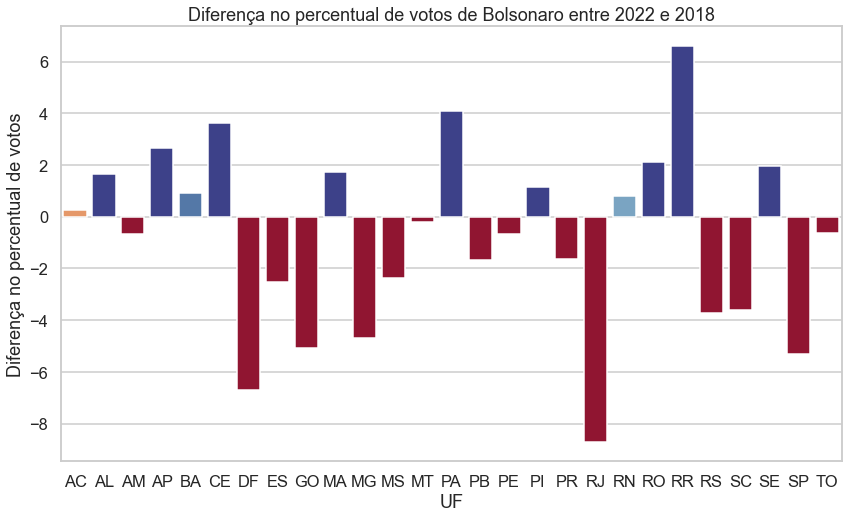

In [ ]:
p = sns.barplot(x='uf', y='dif', data=bolsonaro_dif, palette=cm.RdYlBu(bolsonaro_dif['dif']))
p.set(xlabel='UF', ylabel='Diferença no percentual de votos',
      title='Diferença no percentual de votos de Bolsonaro entre 2022 e 2018')
plt.show()

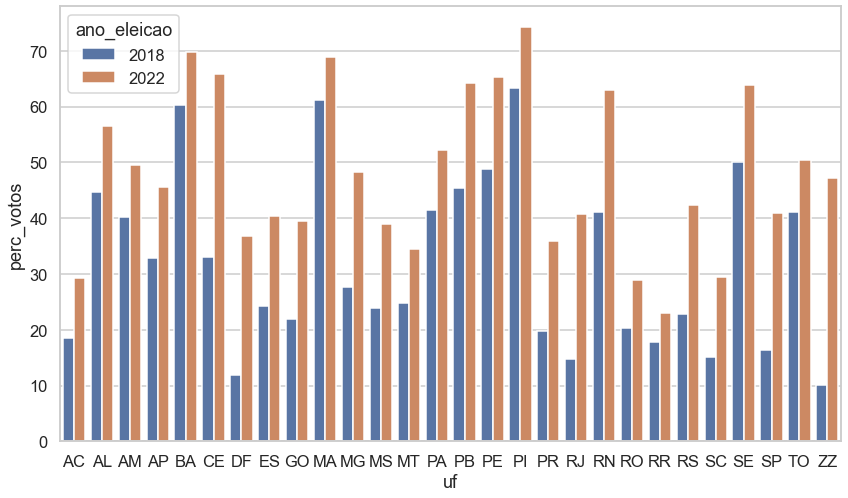

In [ ]:
pt = eleicoes.loc[(eleicoes.nr_candidato == 13) & (eleicoes.nr_turno == 1)]
ax = sns.barplot(x='uf', y='perc_votos', hue='ano_eleicao', data=pt)
plt.show()

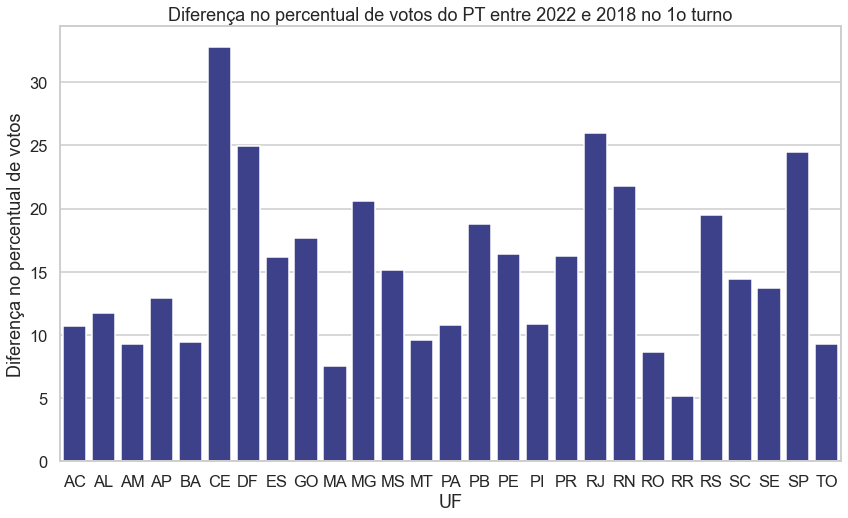

In [ ]:
pt_dif = (
    pt.pivot_table(index='uf', columns='ano_eleicao', values='perc_votos')
    .reset_index()
    .query("uf != 'ZZ'")
)
pt_dif['dif'] = pt_dif[2022] - pt_dif[2018]

p = sns.barplot(x='uf', y='dif', data=pt_dif, palette=cm.RdYlBu(pt_dif['dif']))
p.set(xlabel='UF', ylabel='Diferença no percentual de votos',
      title='Diferença no percentual de votos do PT entre 2022 e 2018 no 1o turno')
plt.show()

In [ ]:
jb_pt = bolsonaro.merge(pt, on=['ano_eleicao', 'nr_turno', 'uf'], suffixes=['_jb', '_pt'])
jb_pt['dif_jb_pt'] = jb_pt['perc_votos_jb'] - jb_pt['perc_votos_pt']
jb_pt

,Unnamed: 0_jb,ano_eleicao,nr_turno,nr_candidato_jb,nm_urna_candidato_jb,uf,votos_jb,perc_votos_jb,Unnamed: 0_pt,nr_candidato_pt,nm_urna_candidato_pt,votos_pt,perc_votos_pt,dif_jb_pt
0,112,2018,1,17,JAIR BOLSONARO,AC,262508,62.238429,28,13,FERNANDO HADDAD,78170,18.533447,43.704982
1,113,2018,1,17,JAIR BOLSONARO,AL,528355,34.403801,29,13,FERNANDO HADDAD,687247,44.750043,-10.346242
2,114,2018,1,17,JAIR BOLSONARO,AM,805902,43.477876,30,13,FERNANDO HADDAD,746998,40.300045,3.177832
3,115,2018,1,17,JAIR BOLSONARO,AP,166935,40.740000,31,13,FERNANDO HADDAD,134287,32.772350,7.967649
4,116,2018,1,17,JAIR BOLSONARO,BA,1725140,23.412220,32,13,FERNANDO HADDAD,4441955,60.282661,-36.870441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,5455,2022,1,22,JAIR BOLSONARO,ZZ,122548,41.610000,4106,13,LULA,138933,47.170000,-5.560000
6324,5455,2022,1,22,JAIR BOLSONARO,ZZ,122548,41.610000,4442,13,LULA,138933,47.170000,-5.560000
6325,5455,2022,1,22,JAIR BOLSONARO,ZZ,122548,41.610000,4778,13,LULA,138933,47.170000,-5.560000
6326,5455,2022,1,22,JAIR BOLSONARO,ZZ,122548,41.610000,5114,13,LULA,138933,47.170000,-5.560000


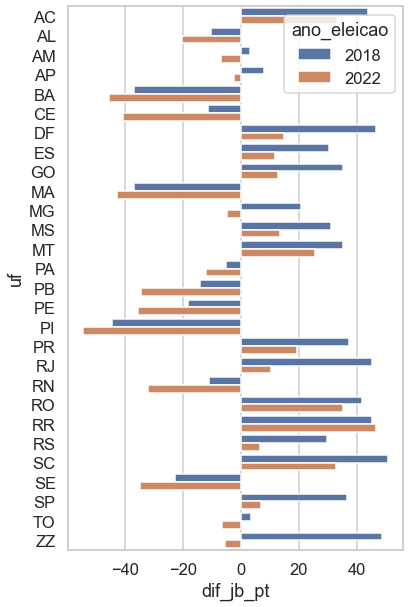

In [ ]:
fig, ax = plt.subplots(figsize=(6, 10))
df = jb_pt[jb_pt.nr_turno == 1]
p = sns.barplot(x='dif_jb_pt', y='uf', hue='ano_eleicao', ax=ax, data=df)
plt.show()

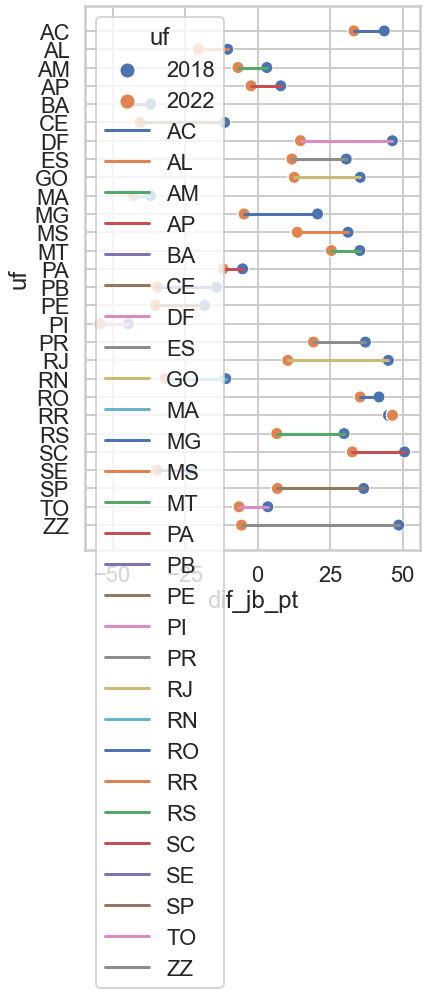

In [ ]:
fig, ax = plt.subplots(figsize=(6, 10))
df = jb_pt[jb_pt.nr_turno == 1]
#p = sns.scatterplot(x='dif_jb_pt', y='uf', hue='ano_eleicao', palette="deep", ax=ax, data=df)
p = sns.scatterplot(x='dif_jb_pt', y='uf', hue='ano_eleicao', palette="deep", ax=ax, data=df)
sns.lineplot(x='dif_jb_pt', y='uf', hue='uf', palette="deep", ax=ax, data=df)
plt.show()

In [ ]:
jb_pt_dif = bolsonaro_dif.merge(pt_dif, on=['uf'], suffixes=['_jb', '_pt'])
jb_pt_dif['dif_2018'] = jb_pt_dif['2018_jb'] - jb_pt_dif['2018_pt']
jb_pt_dif['dif_2022'] = jb_pt_dif['2022_jb'] - jb_pt_dif['2022_pt']
jb_pt_dif['dif_jb_pt'] = jb_pt_dif['dif_2022'] - jb_pt_dif['dif_2018']
jb_pt_dif

ano_eleicao,uf,2018_jb,2022_jb,dif_jb,2018_pt,2022_pt,dif_pt,dif_2018,dif_2022,dif_jb_pt
0,AC,62.238429,62.50,0.261571,18.533447,29.26,10.726553,43.704982,33.24,-10.464982
1,AL,34.403801,36.05,1.646199,44.750043,56.50,11.749957,-10.346242,-20.45,-10.103758
2,AM,43.477876,42.80,-0.677876,40.300045,49.58,9.279955,3.177832,-6.78,-9.957832
3,AP,40.740000,43.41,2.670000,32.772350,45.67,12.897650,7.967649,-2.26,-10.227649
4,BA,23.412220,24.31,0.897780,60.282661,69.73,9.447339,-36.870441,-45.42,-8.549559
5,CE,21.742650,25.38,3.637350,33.123784,65.91,32.786216,-11.381134,-40.53,-29.148866
6,DF,58.366100,51.65,-6.716100,11.873230,36.85,24.976770,46.492870,14.80,-31.692870
7,ES,54.760857,52.23,-2.530857,24.198740,40.40,16.201260,30.562117,11.83,-18.732117
8,GO,57.237573,52.16,-5.077573,21.855471,39.51,17.654529,35.382103,12.65,-22.732103
9,MA,24.281077,26.02,1.738923,61.261374,68.84,7.578626,-36.980297,-42.82,-5.839703


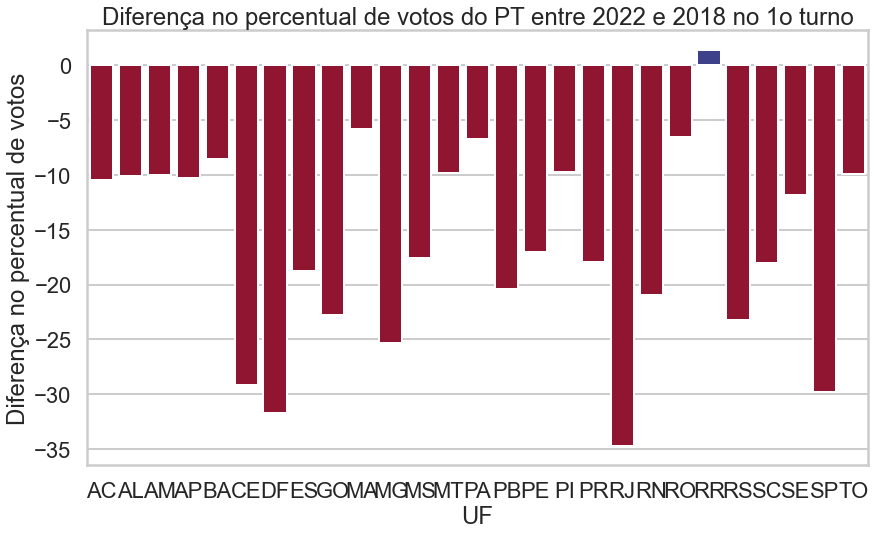

In [ ]:
p = sns.barplot(x='uf', y='dif_jb_pt', data=jb_pt_dif, palette=cm.RdYlBu(jb_pt_dif['dif_jb_pt']))
p.set(xlabel='UF', ylabel='Diferença no percentual de votos',
      title='Diferença no percentual de votos do PT entre 2022 e 2018 no 1o turno')
plt.show()